In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../hopfield/')

In [12]:
import torch
import numpy as np 
import matplotlib.pyplot as plt

import utils
from model import HopfieldNet, SmallWorldHopfieldNet, MiniHopfieldNet
from experiments import test_for_any_valid_memory_recall, test_for_exact_memory_recall
from utils import gen_partial_pattern, cnt_patterns_present, cnt_pattern_matches

### Run simple hopfield network

In [13]:
# Test of the % of partial patterns map to a valid memory
def test_for_any_valid_memory_recall():
    n = 100
    num_memories_list = [3, 5, 7, 10, 13, 15, 25, 35, 50]
    num_test = 100
    memories = np.random.choice([-1, 1], size = (max(num_memories_list), n))
    num_trials = 20
    mean_recall_rates = []
    std_recall_rates = []
    for i, num_memories in enumerate(num_memories_list):
        recall_rates = []
        for t in range(num_trials):
            indices = np.random.choice(num_memories, size = num_test)
            patterns = memories[indices, :]
            network = HopfieldNet(n)
            network.store(patterns)
            res = network.recall(gen_partial_pattern(patterns), update = 'async')
            num_correct = cnt_patterns_present(res, patterns)
            recall_rates.append(num_correct/num_test)
        mean_recall_rates.append(np.mean(recall_rates))
        std_recall_rates.append(np.std(recall_rates))

    # Plot results
    plt.errorbar(num_memories_list, mean_recall_rates, std_recall_rates, label = 'any stored pattern')
    # Add plot labels
    plt.xlabel('Num of memories')
    plt.ylabel('Recall rate')
    plt.title('Hopfield network performance (recall any stored pattern)')
    plt.legend()

def test_for_exact_memory_recall():
    n = 100
    num_memories_list = [3, 5, 7, 10, 13, 15, 25, 35, 50]
    num_test = 100
    memories = np.random.choice([-1, 1], size = (max(num_memories_list), n))
    network = HopfieldNet(n)
    network.store(memories)
    recall_rates = []
    num_trials = 20
    mean_recall_rates = []
    std_recall_rates = []
    for i, num_memories in enumerate(num_memories_list):
        recall_rates = []
        for t in range(num_trials):
            indices = np.random.choice(num_memories, size = num_test)
            patterns = memories[indices, :]
            network = HopfieldNet(n)
            network.store(patterns)
            res = network.recall(gen_partial_pattern(patterns), update = 'async')
            num_correct = cnt_pattern_matches(res, patterns)
            recall_rates.append(num_correct/num_test)
        mean_recall_rates.append(np.mean(recall_rates))
        std_recall_rates.append(np.std(recall_rates))
    # Plot results
    plt.errorbar(num_memories_list, mean_recall_rates, std_recall_rates, label = 'correct_pattern')
    # Add plot labels
    plt.xlabel('Num of memories')
    plt.ylabel('Recall rate')
    plt.title('Hopfield network performance (recall correct pattern)')
    plt.legend()


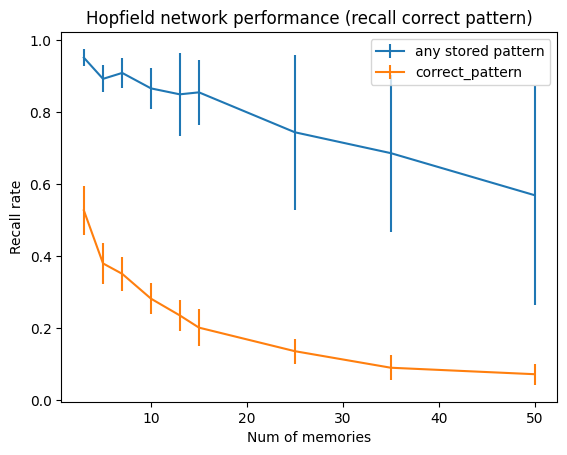

In [14]:
test_for_any_valid_memory_recall()
test_for_exact_memory_recall()
#run_vanilla_hopfield()

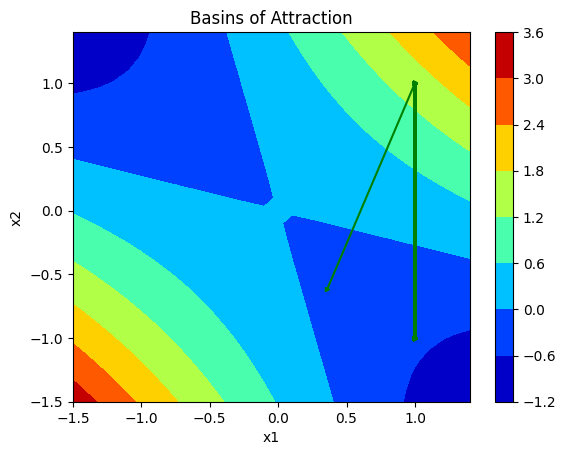

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from model import HopfieldNet

# Generate a Hopfield network with 3 attractor states
patterns = np.array([[1, 1, -1, -1], [-1, -1, 1, 1], [1, -1, 1, -1]])
n_neurons = patterns.shape[1]
hopfield_net = HopfieldNet(n_neurons)
hopfield_net.store(patterns)

# Define the energy landscape
resolution = 0.1
x = np.arange(-1.5, 1.5, resolution)
y = np.arange(-1.5, 1.5, resolution)
X, Y = np.meshgrid(x, y)
energy_landscape = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        energy_landscape[i, j] = hopfield_net.energy([np.array([x[i], y[j], x[i], y[j]])])[0]

# Visualize the energy landscape
plt.figure()
plt.contourf(X, Y, energy_landscape.T, cmap=plt.cm.jet)
plt.colorbar()
plt.title('Energy Landscape')
plt.xlabel('x1')
plt.ylabel('x2')

# Simulate the state trajectory starting from a random initial state
n_steps = 100
x_init = np.random.rand(n_neurons) * 2 - 1
x_traj = hopfield_net.simulate(x_init, n_steps)

# Visualize the state trajectory and the basins of attraction
#plt.figure()
# for i in range(n_steps):
#     state = x_traj[i]
#     energy = hopfield_net.energy([state])
#     attractor = np.argmin(np.sum((patterns - state)**2, axis=1))
#     color = ['r', 'g', 'b'][attractor]
#     #plt.plot(state[0], state[1], color=color, marker='o', markersize=3)
    
plt.plot(x_traj[:, 0], x_traj[:, 1], '->', color='g', markersize=3)
plt.title('Basins of Attraction')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [41]:
import numpy as np
from model.hopfield_network import HopfieldNetwork

# Generate a Hopfield network with 3 attractor states
patterns = np.array([[1, 1, -1, -1]])
n_neurons = patterns.shape[1]
hopfield_net = HopfieldNetwork(n_neurons)
hopfield_net.train(patterns)

# Test synchronous updates
print('Testing synchronous updates...')
x_init = np.array([1, -1, 1, 1])
print(f'Initial state: {x_init}')
x_sync = hopfield_net.simulate(x_init, n_steps=10, update_method='synchronous')
print(f'Synchronous update: {x_sync}')

# Test asynchronous updates
print('\nTesting asynchronous updates...')
x_init = np.array([1, 1, 1, 1])
print(f'Initial state: {x_init}')
x_async = hopfield_net.simulate(x_init, n_steps=10, update_method='asynchronous')
print(f'Asynchronous update: {x_async}')

Testing synchronous updates...
Initial state: [ 1 -1  1  1]


AttributeError: 'HopfieldNetwork' object has no attribute 'recall'